### ***Session 1 : Import Libraries and Load Data***

In [154]:
import pandas as pd         
import numpy as np      
import seaborn as sns        
import matplotlib.pyplot as plt  
plt.style.use('fivethirtyeight')     
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import warnings      
warnings.filterwarnings('error')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_absolute_error,r2_score

In [155]:
train=pd.read_csv('train.csv',encoding='utf-8')
test=pd.read_csv('test.csv',encoding='utf-8')

### ***Session 2 : Understanding the Data***

**i) Brief information about the data**

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**ii) Summary statistic of the numerical features in the dataset**

In [157]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**iii) Check for Duplicates**

In [158]:
train.duplicated().sum()

0

**iv) Check for Null Values**

In [159]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**v) Display of First Five Rows**

In [160]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ***Session 3 : Data Cleaning***

**i) Pick out interesting features for analysis**

In [161]:
train.drop(columns=['Id', 'MSSubClass','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'MSZoning', 'LotFrontage',
       'Alley','Condition2','Exterior2nd', 'MasVnrType',
       'MasVnrArea','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath',
       'TotRmsAbvGrd', 'Functional',
       'GarageYrBlt','GarageCars','WoodDeckSF',
       '3SsnPorch', 'ScreenPorch', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold'
       ],axis=1,inplace=True)

test.drop(columns=['Id', 'MSSubClass','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'MSZoning', 'LotFrontage',
       'Alley','Condition2','Exterior2nd', 'MasVnrType',
       'MasVnrArea','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath',
       'TotRmsAbvGrd', 'Functional',
       'GarageYrBlt','GarageCars','WoodDeckSF',
       '3SsnPorch', 'ScreenPorch', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold'
       ],axis=1,inplace=True)

**ii) Fill in Null Values**

In [162]:
train.fillna({
    'Electrical':'Not Mentioned'
    },inplace=True)

test.fillna({
    'Utilities':'Not Mentioned',
    'Exterior1st':'Not Mentioned',
    'TotalBsmtSF':0,
    'KitchenQual':'Not Mentioned',
    'GarageArea':0,
    'SaleType':'Not Mentioned'
},inplace=True)

**iii) Sort the Data by SalePrice in Descending Order**

In [163]:
train=train.sort_values(by='SalePrice',ascending=False)
train.reset_index(inplace=True)
train.drop(['index'],axis=1,inplace=True)

In [164]:
train.iloc[:5]

,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,Ex,TA,PConc,2444,GasA,Ex,Y,SBrkr,3,4,1,Ex,2,832,Y,50,0,0,2007,WD,Normal,755000
1,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,Gd,TA,PConc,2396,GasA,Ex,Y,SBrkr,3,4,1,Ex,2,813,Y,78,0,555,2007,WD,Abnorml,745000
2,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,Gd,Gd,PConc,1930,GasA,Ex,Y,SBrkr,3,4,1,Gd,1,807,Y,76,0,0,2006,WD,Normal,625000
3,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,Ex,TA,PConc,2330,GasA,Ex,Y,SBrkr,2,2,1,Ex,2,820,Y,67,0,0,2010,New,Partial,611657
4,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,Ex,TA,PConc,1734,GasA,Ex,Y,SBrkr,3,4,1,Ex,1,1020,Y,170,0,0,2009,New,Partial,582933


**iv) Add New Feature ----> SalePriceLevel**

In [165]:
train['SalePriceLevel']=train['SalePrice'].apply(lambda x : 'Low' if x <= 200000 else 'Medium' if (x > 200000 and x <= 400000) else 'High')

**v) Modify the Length of training data to match testing data**

In [166]:
train.drop([1000],axis=0,inplace=True)
train.reset_index(inplace=True)
train.drop(['index'],axis=1,inplace=True)

### ***Session 4 : Exploratory Data Analysis***

*i) What is the Average Lot Area, OpenPorch Area, Basement Area and Garage Area for a 2 story building*

In [167]:
lot=round(train.query('HouseStyle == "2Story"')['LotArea'].mean(),2)
garage=round(train.query('HouseStyle == "2Story"')['GarageArea'].mean(),2)
porch=round(train.query('HouseStyle == "2Story"')['OpenPorchSF'].mean(),2)
bsmt=round(train.query('HouseStyle == "2Story"')['TotalBsmtSF'].mean(),2)
print(f'Average Lot Area : {lot} sf\nAverage Garage Area : {garage} sf\nAverage Porch Area : {porch} sf\nAverage Basement Area : {bsmt} sf')

Average Lot Area : 10325.17 sf
Average Garage Area : 517.51 sf
Average Porch Area : 65.25 sf
Average Basement Area : 939.0 sf


*ii) What is the Average Number of Bathrooms,Bedrooms,Kitchens and Fireplaces for a 2 story building*

In [168]:
bath=round(train.query('HouseStyle == "2Story"')['FullBath'].mean())
bedroom=round(train.query('HouseStyle == "2Story"')['BedroomAbvGr'].mean())
kitchen=round(train.query('HouseStyle == "2Story"')['KitchenAbvGr'].mean())
fire=round(train.query('HouseStyle == "2Story"')['Fireplaces'].mean())
print(f'Average Bathrooms : {bath}\nAverage Bedrooms : {bedroom}\nAverage Kitchens : {kitchen}\nAverage FirePlaces : {fire}')

Average Bathrooms : 2
Average Bedrooms : 3
Average Kitchens : 1
Average FirePlaces : 1


*iii) How is Land Slope distributed by Sale Price Level*

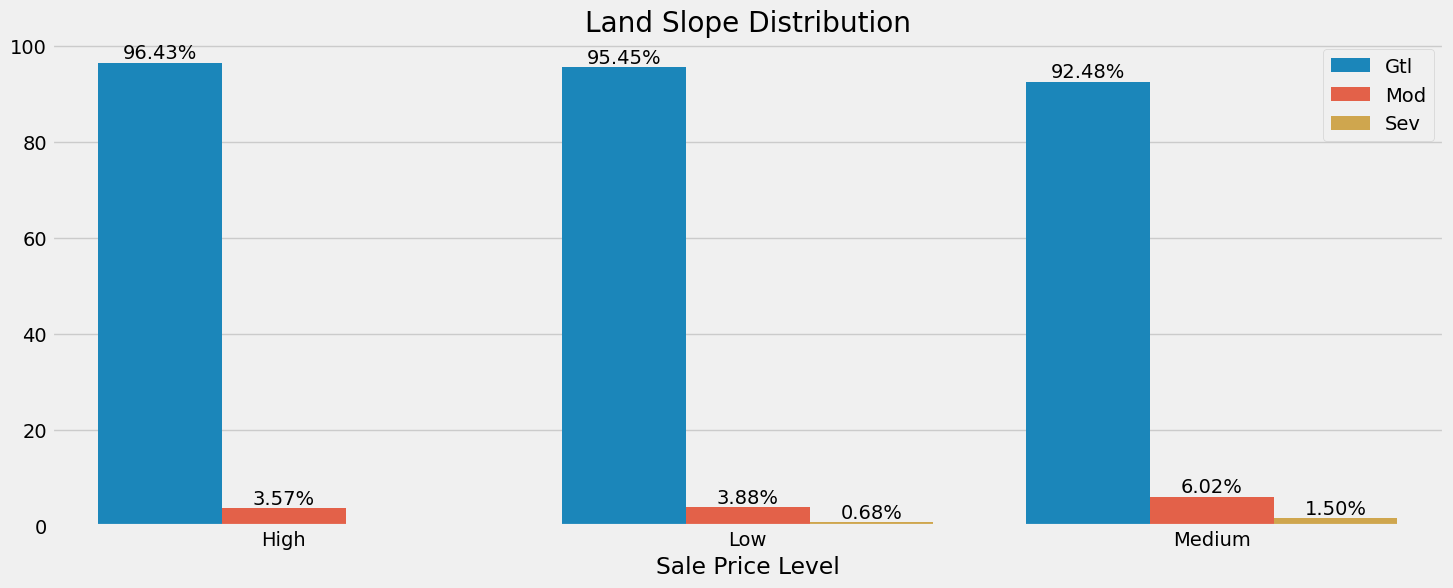

In [169]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(train.groupby('SalePriceLevel')['LandSlope'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(train.groupby('SalePriceLevel')['LandSlope'].value_counts(normalize=True)*100).values,
    hue=(train.groupby('SalePriceLevel')['LandSlope'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.xlabel('Sale Price Level')
plt.title('Land Slope Distribution')
plt.legend(loc='upper right')
plt.show()

*iv) How is Lot Configuration distributed by Sale Price Level*

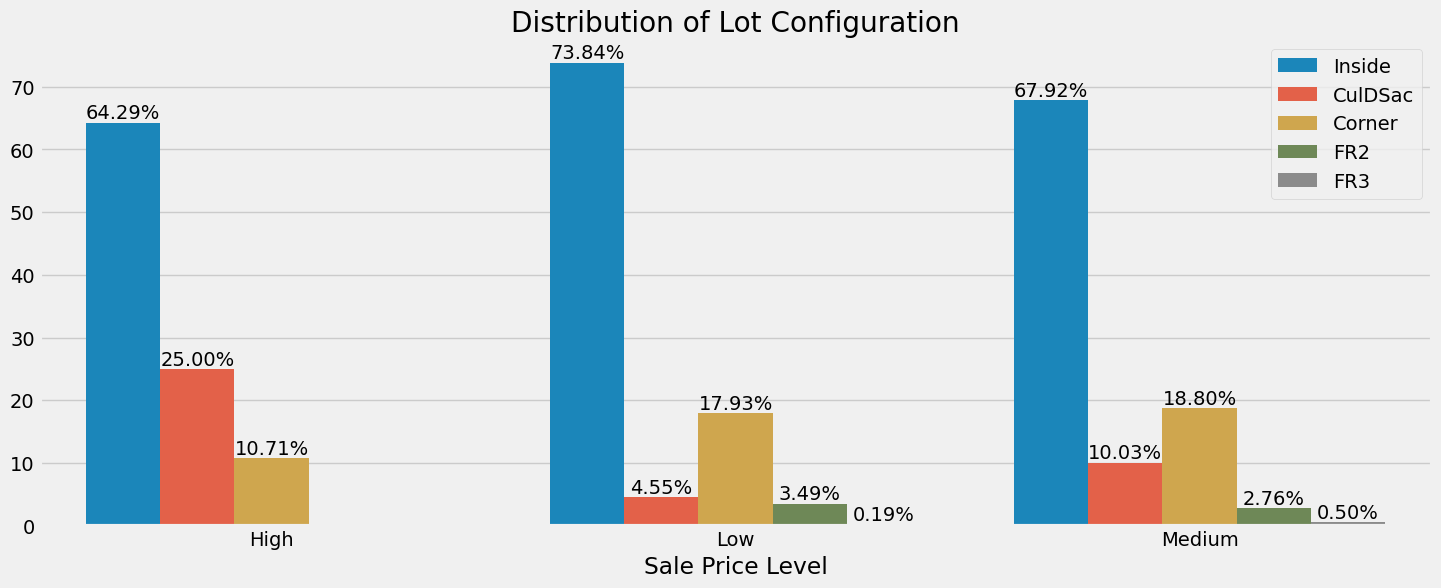

In [170]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(train.groupby('SalePriceLevel')['LotConfig'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(train.groupby('SalePriceLevel')['LotConfig'].value_counts(normalize=True)*100).values,
    hue=(train.groupby('SalePriceLevel')['LotConfig'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.xlabel('Sale Price Level')
plt.title('Distribution of Lot Configuration')
plt.legend(loc='upper right')
plt.show()

*v) How is Land Contour distributed by Sale Price Level*

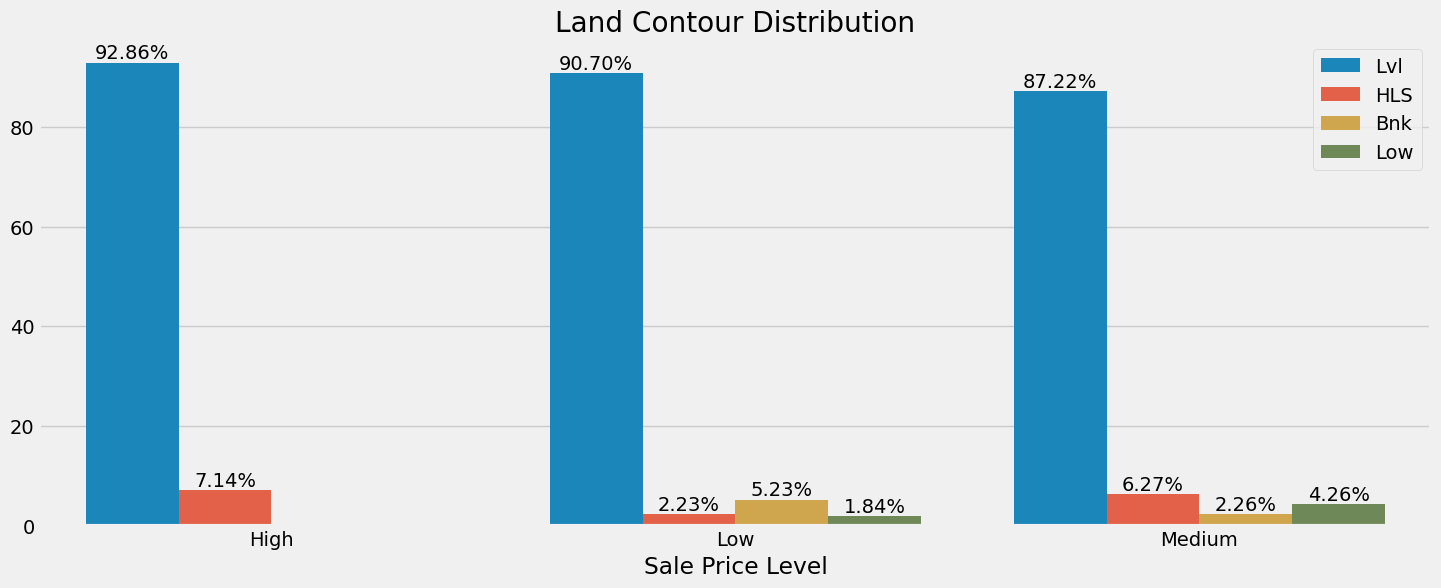

In [171]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(train.groupby('SalePriceLevel')['LandContour'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(train.groupby('SalePriceLevel')['LandContour'].value_counts(normalize=True)*100).values,
    hue=(train.groupby('SalePriceLevel')['LandContour'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.xlabel('Sale Price Level')
plt.title('Land Contour Distribution')
plt.legend(loc='upper right')
plt.show()

*vi) Is there a correlation between Lot Area and Sale Price ?* 

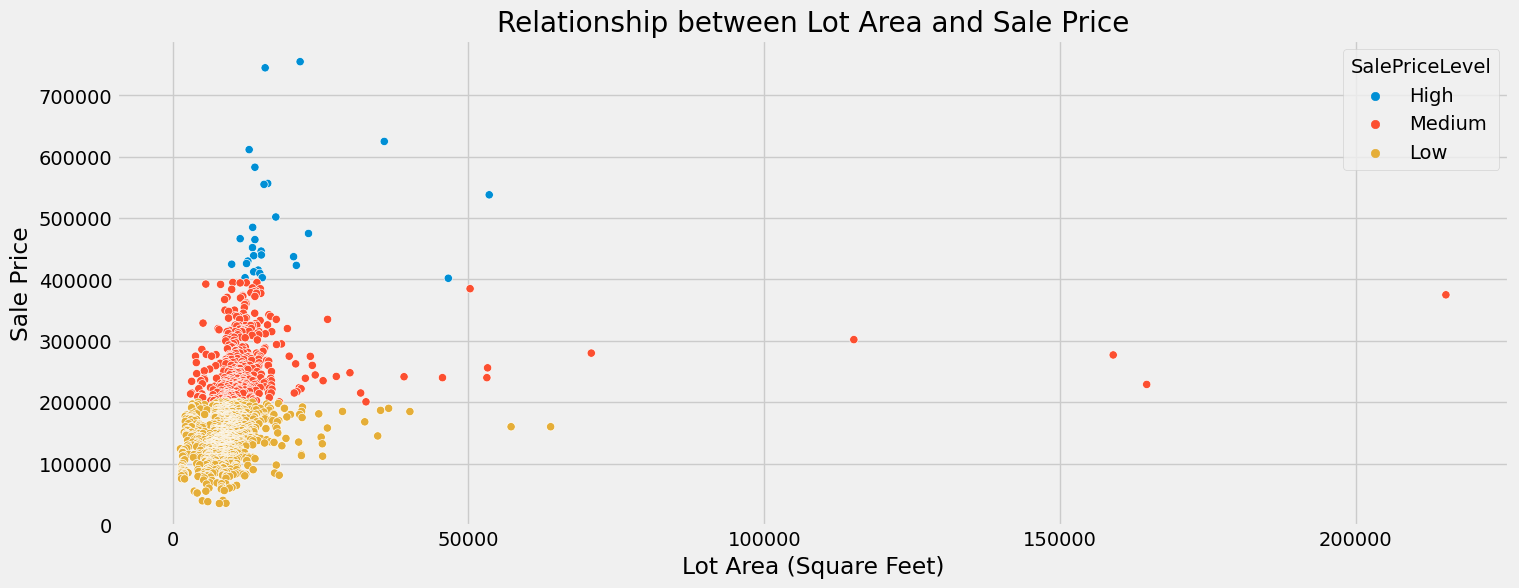

In [172]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=train['LotArea'],y=train['SalePrice'],hue=train['SalePriceLevel'])
plt.title('Relationship between Lot Area and Sale Price')
plt.xlabel('Lot Area (Square Feet)')
plt.ylabel('Sale Price')
plt.show()

**A greater percentage of houses have Lot Areas less than 50,000 Square Feet(sf)**.

In [173]:
train[['LotArea','SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.263852
SalePrice,0.263852,1.000000


**The Correlation Coefficient between Lot Area and Sale Price is very low which suggests a minimal relationship.**

*vii) How are the other numeric features in the dataset related to Sale Price ?*

In [174]:
train[['TotalBsmtSF','FullBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','PoolArea','GarageArea','OpenPorchSF','SalePrice']].corr()

,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,GarageArea,OpenPorchSF,SalePrice
TotalBsmtSF,1.000000,0.323696,0.050430,-0.068876,0.339748,0.126063,0.486652,0.247397,0.613719
FullBath,0.323696,1.000000,0.363244,0.133260,0.244313,0.049652,0.405492,0.260459,0.561137
BedroomAbvGr,0.050430,0.363244,1.000000,0.198625,0.107711,0.070711,0.065199,0.093905,0.168293
KitchenAbvGr,-0.068876,0.133260,0.198625,1.000000,-0.124114,-0.014535,-0.064362,-0.070206,-0.136003
Fireplaces,0.339748,0.244313,0.107711,-0.124114,1.000000,0.095058,0.269602,0.169027,0.466765
PoolArea,0.126063,0.049652,0.070711,-0.014535,0.095058,1.000000,0.061079,0.060739,0.092387
GarageArea,0.486652,0.405492,0.065199,-0.064362,0.269602,0.061079,1.000000,0.241760,0.623759
OpenPorchSF,0.247397,0.260459,0.093905,-0.070206,0.169027,0.060739,0.241760,1.000000,0.315678
SalePrice,0.613719,0.561137,0.168293,-0.136003,0.466765,0.092387,0.623759,0.315678,1.000000


**There is a high correlation between ;**

1.Sale Price and Total Basement Area

2.Sale Price and Total Number of Bathrooms 

3.Sale Price and Garage Area

*viii)What is the trend in Construction, Renovation and Purchase for the 1st 10 Most Expensive Houses*

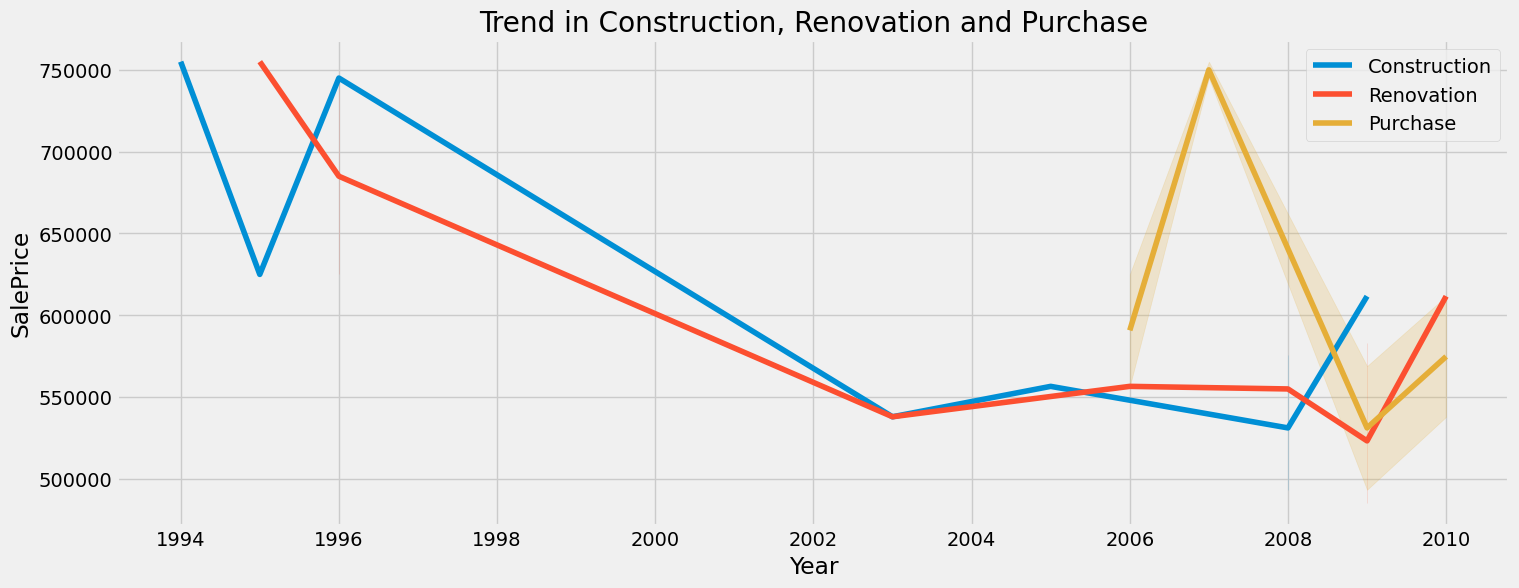

In [175]:
plt.figure(figsize=(16,6))
sns.lineplot(x=train['YearBuilt'].iloc[:10],y=train['SalePrice'],label='Construction')
sns.lineplot(x=train['YearRemodAdd'].iloc[:10],y=train['SalePrice'],label='Renovation')
sns.lineplot(x=train['YrSold'].iloc[:10],y=train['SalePrice'],label='Purchase')
plt.xlabel('Year')
plt.title('Trend in Construction, Renovation and Purchase')
plt.show()

*ix)How is Sale Price distributed*

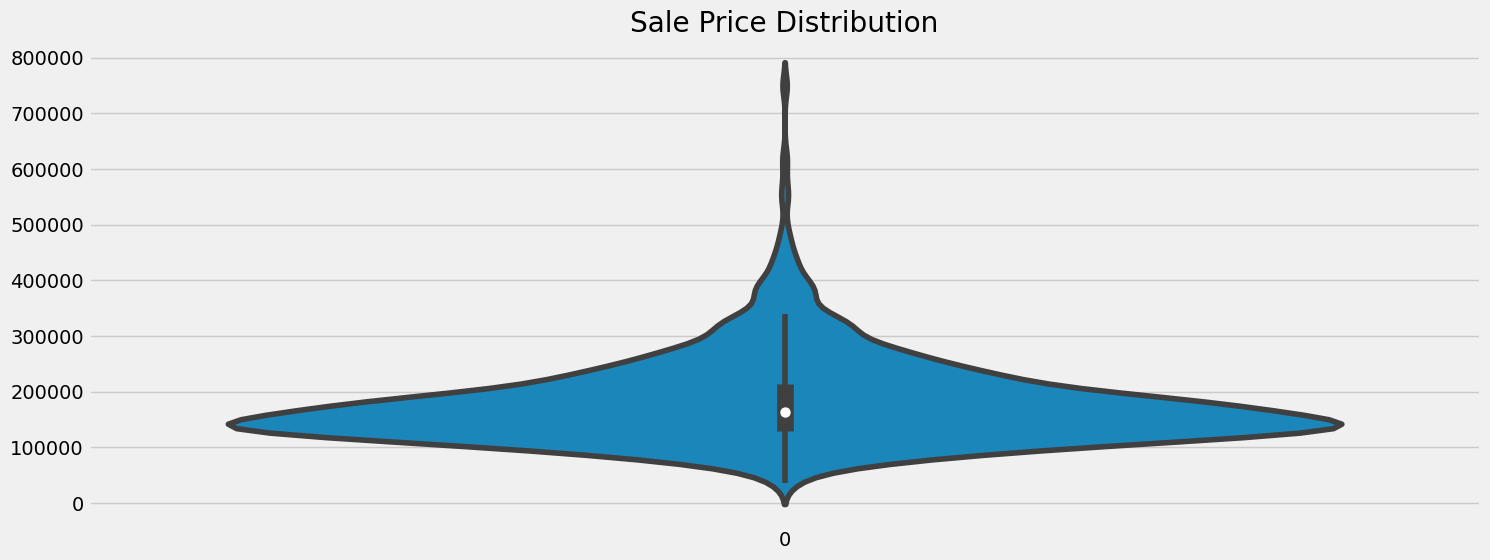

In [176]:
plt.figure(figsize=(16,6))
sns.violinplot(train['SalePrice'])
plt.title('Sale Price Distribution')
plt.show()

**Most the Houses cost between $100,000 and $200,000**

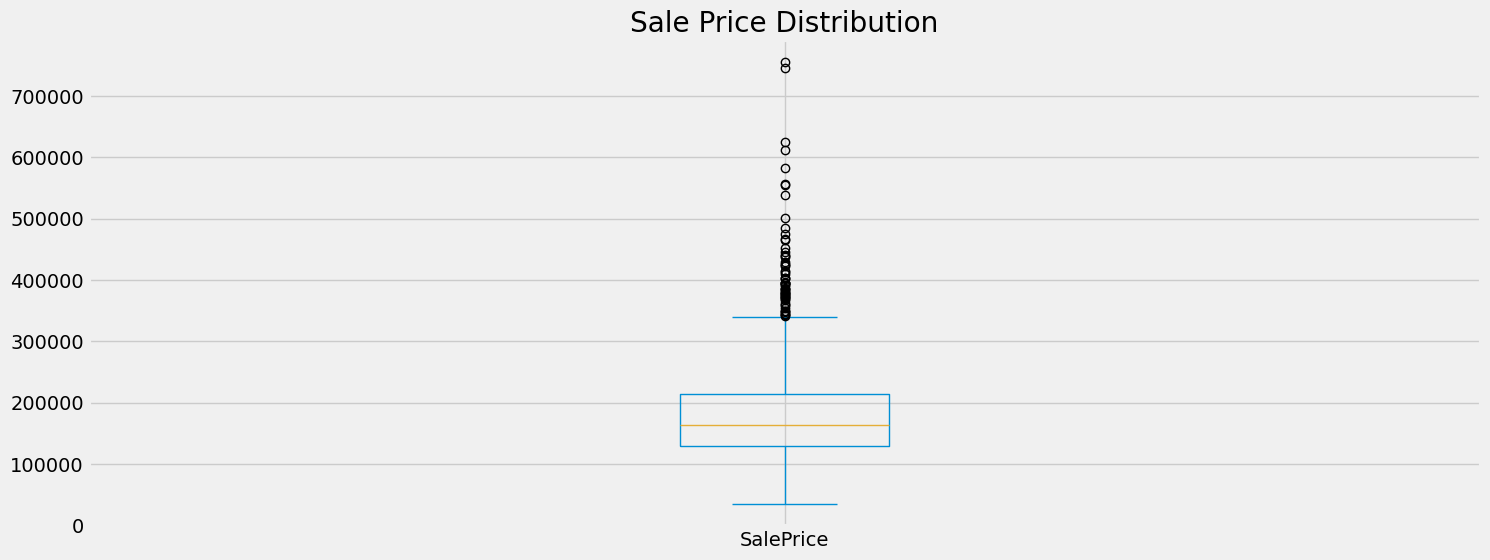

In [177]:
train['SalePrice'].plot(kind='box',figsize=(16,6))
plt.title('Sale Price Distribution')
plt.show()

In [178]:
train['SalePrice'].quantile([0.05,0.25,0.50,0.75,0.95])

0.05     88000.0
0.25    129950.0
0.50    163000.0
0.75    214000.0
0.95    326200.0
Name: SalePrice, dtype: float64

In [179]:
iqr1,iqr2=np.percentile(train['SalePrice'],[75,25])
iqr1-iqr2

84050.0

**50th percentile is $163,000**

**25th percentile is $129,975**

**75th percentile is $ 214,000**

**InterQuartile Range is $84,025**

### ***Session 5 : Model Building and Training***

**i) Split Data in X and y variables**

In [180]:
X=train.drop(columns=['SalePrice','SalePriceLevel'])
y=train['SalePrice']

**ii) Preprocessing**

In [181]:
enc=OrdinalEncoder()
X=enc.fit_transform(X)
test=enc.fit_transform(test)

**iii) Build Model, Train and Test**

In [182]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=500,learning_rate=0.05)
model.fit(X,y)
predict=model.predict(test)

In [184]:
r2_score(y,predict)*100

-89.11933554960396

**iv) Prepare Predictions for Submission**

In [185]:
pred=pd.DataFrame(predict)
sub=pd.read_csv('sample_submission.csv')
sub.drop(['SalePrice'],axis=1,inplace=True)
sub['SalePrice']=pred[0]

In [186]:
sub.iloc[:10]

,Id,SalePrice
0,1461,129705.593750
1,1462,153466.375000
2,1463,160118.109375
3,1464,181077.515625
4,1465,196852.296875
5,1466,169829.265625
6,1467,167663.703125
7,1468,175892.875000
8,1469,181847.078125
9,1470,114708.062500


In [187]:
#sub.to_csv('sample_submission2.csv',index=False)